To use Padé approximants for approximating sin (x), first find the Taylor series of sin (x) around x=0, then equate it to a rational function P(x)/Q(x) where P(x) and Q(x) are polynomials with Q(x)'s constant term being 1

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math

build Taylor coefficients for sin(x) i choose 10 for the taylor order to have the approximation
fit sinx better

In [24]:
N = 10 # total taylor order (degrees for P and Q will be half this)
coeffs = [0.0] * (N + 1)   
# forming the taylor series
for n in range(N + 1):
    if n % 2 == 1:  # this makes only odd powers have none zeros
        coeffs[n] = ((-1) ** ((n - 1) // 2)) / math.factorial(n)
    else:
        coeffs[n] = 0.0

In [25]:
m = 5  # the degree for P and Q
P_poly, Q_poly = interpolate.pade(coeffs, m)

print("Numerator polynomial P(x):", P_poly)   
print("Denominator polynomial Q(x):", Q_poly)

# P_poly and Q_poly come back as arrays this turns them into a callable function
p = np.poly1d(P_poly) 
q = np.poly1d(Q_poly)

def pade_eval(x):
    denom = q(x)
    safe = np.abs(denom) > 1e-12 # avoids divide by zero
    y = np.full_like(x, np.nan, dtype=float) 
    # ^^ Creates an array y the same shape as x, filled with not-a-number to 
    # avoid unsafe values that might divide by zero
    y[safe] = p(x[safe]) / denom[safe] # only evaluate P(x)/Q(x) at safe positions
    return y # gives the safe values and the NaN

Numerator polynomial P(x):           5          3
0.003313 x - 0.1338 x + 1 x
Denominator polynomial Q(x):            4     3           2
0.0004509 x - 0 x + 0.03283 x - 0 x + 1


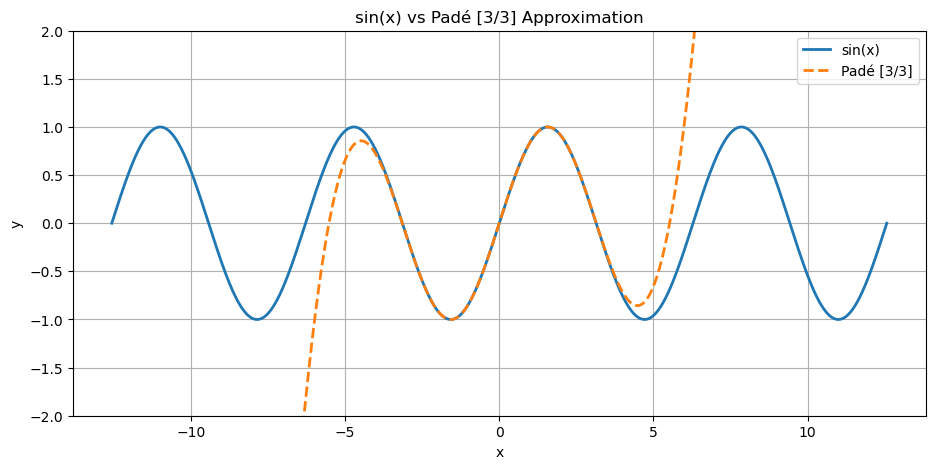

In [26]:
x_vals = np.linspace(-4 * np.pi, 4 * np.pi, 2000)
y_sin = np.sin(x_vals)
y_pade = pade_eval(x_vals)

plt.figure(figsize=(11,5))
plt.plot(x_vals, y_sin, label='sin(x)', linewidth=2)
plt.plot(x_vals, y_pade, '--', label='Padé [5/5]', linewidth=2)
plt.title('sin(x) vs Padé [5/5] Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.show()